In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S4/Office_Amelie-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [26]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 8s 22ms/step - loss: 39.4904
Epoch 2/300
62/62 [==============================] - 1s 22ms/step - loss: 29.2141
Epoch 3/300
62/62 [==============================] - 1s 22ms/step - loss: 26.5094
Epoch 4/300
62/62 [==============================] - 1s 22ms/step - loss: 26.9853
Epoch 5/300
62/62 [==============================] - 1s 22ms/step - loss: 23.8946
Epoch 6/300
62/62 [==============================] - 1s 22ms/step - loss: 24.0237
Epoch 7/300
62/62 [==============================] - 1s 22ms/step - loss: 23.1413
Epoch 8/300
62/62 [==============================] - 1s 22ms/step - loss: 23.8981
Epoch 9/300
62/62 [==============================] - 1s 22ms/step - loss: 22.3584
Epoch 10/300
62/62 [==============================] - 1s 22ms/step - loss: 22.3191
Epoch 11/300
62/62 [==============================] - 1s 23ms/step - loss: 21.1351
Epoch 12/300
62/62 [==============================] - 1s 23ms/step - loss: 20.9745
Epoch 13/300


In [27]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [29]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 4.826437269958787
RMSE for BiLSTM Model for testing is: 5.735949074817154
MAE for BiLSTM Model for training is: 2.9991937682548917
MAE for BiLSTM Model for testing is: 3.1057962513518054
MAPE for BiLSTM Model for training is: 0.13175117347797408
MAPE for BiLSTM Model for testing is: 0.15798463244512903


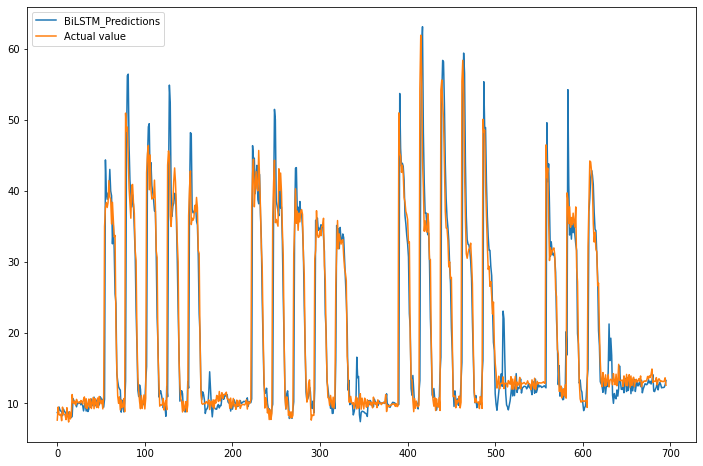

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([7.65]), array([8.7347975], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-1.08479748]), array([1.04925846]), array([-1.02895859]), array([-0.77623573]), array([-0.45035889]), array([-1.28626602]), array([1.19852398]), array([-0.65392895]), array([-0.43898441]), array([-0.41329517]), array([-0.84696701]), array([1.31643524]), array([-0.60173466]), array([-1.04417336]), array([0.93655739]), array([-0.59622353]), array([0.24110558]), array([3.1009977]), array([-0.50017555]), array([-0.39526009]), array([0.33047493]), array([-0.12559269]), array([1.05367668]), array([0.16511986]), array([0.09297379]), array([0.19385193]), array([-0.08039993]), array([0.61386005]), array([0.24184303]), array([0.17761414]), array([1.62805088]), array([1.24541466]), array([-0.67843468]), array([1.74027912]), array([-0.57333038]), array([0.98667583]), array([1.44771587]), array([-0.81597076]), array([1.20312515]), array([-1.32859989]), array([0.319613]), array([0.84221443]), array([-1.63034939]), array([1.04199738]), array([-0.54711105]), array([-0.81442841]), array([1.1291

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([41.17341103]), array([-18.90173889]))

In [22]:
max(d1)-min(d1)

array([60.07514992])

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(314, 382)